#### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as pt

#### IMPORTING DATA

In [2]:
df = pd.read_csv("Ads_Optimisation.csv")

In [3]:
df

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


#### IMPLEMENTING THOMPSON SAMPLING

In [4]:
df.shape

(10000, 10)

In [5]:
import random
N = df.shape[0]
d = df.shape[1]
ads_selected = []
no_of_rewards_1 = [0] * d
no_of_rewards_0 = [0] * d
total_reward = 0

In [6]:
for n in range(5000):
    ad = 0
    max_random_beta = 0
    for i in range(d):
        random_beta = random.betavariate(no_of_rewards_1[i] + 1, no_of_rewards_0[i] + 1)
        if random_beta > max_random_beta:
            max_random_beta = random_beta
            ad = i
    ads_selected.append(ad)
    reward = df.iloc[n, ad]
    if reward == 1:
        no_of_rewards_1[ad] += 1
    else:
        no_of_rewards_0[ad] += 1
    total_reward += reward

In [7]:
print(ads_selected)

[1, 7, 9, 2, 8, 4, 9, 6, 0, 1, 7, 4, 5, 6, 5, 3, 0, 8, 3, 2, 0, 9, 4, 9, 2, 8, 9, 7, 6, 6, 5, 1, 7, 8, 3, 0, 2, 4, 9, 5, 8, 1, 0, 1, 7, 2, 4, 0, 1, 9, 3, 6, 2, 1, 9, 2, 1, 3, 9, 5, 2, 1, 5, 3, 3, 3, 2, 0, 3, 2, 8, 9, 3, 7, 8, 3, 6, 8, 9, 2, 6, 2, 9, 6, 1, 3, 3, 2, 1, 3, 4, 4, 0, 6, 4, 0, 7, 0, 4, 8, 7, 9, 4, 8, 4, 4, 3, 4, 8, 1, 3, 4, 1, 8, 3, 5, 1, 8, 4, 8, 7, 8, 7, 1, 8, 3, 5, 7, 8, 0, 8, 7, 8, 3, 8, 4, 4, 4, 8, 8, 8, 7, 2, 7, 7, 5, 3, 4, 8, 7, 7, 4, 5, 8, 7, 8, 4, 8, 7, 7, 3, 0, 7, 9, 2, 4, 5, 7, 4, 7, 7, 8, 8, 1, 6, 0, 8, 7, 9, 3, 7, 1, 5, 7, 2, 8, 7, 4, 7, 6, 0, 6, 8, 7, 3, 7, 9, 7, 8, 8, 4, 2, 4, 5, 6, 8, 5, 9, 4, 8, 4, 7, 4, 4, 3, 4, 3, 4, 1, 4, 4, 7, 6, 7, 8, 4, 8, 8, 6, 7, 8, 2, 3, 5, 2, 4, 8, 7, 4, 4, 7, 7, 3, 2, 4, 5, 1, 7, 7, 9, 1, 4, 7, 4, 1, 7, 3, 4, 4, 9, 7, 2, 4, 8, 0, 4, 5, 7, 0, 3, 4, 4, 7, 9, 2, 7, 8, 3, 4, 3, 1, 2, 3, 4, 4, 4, 8, 4, 4, 3, 4, 3, 3, 3, 8, 3, 8, 2, 9, 7, 3, 4, 7, 7, 9, 7, 8, 8, 3, 6, 4, 4, 4, 1, 5, 8, 7, 1, 7, 9, 3, 7, 1, 6, 1, 4, 3, 3, 1, 8, 2, 3, 4, 

Text(0, 0.5, 'No. of times each ad was selected by the algorithm')

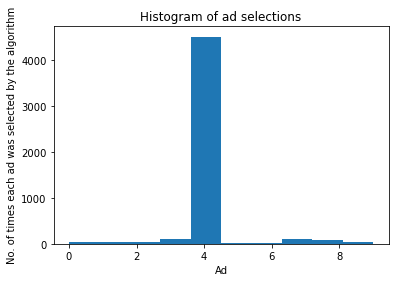

In [8]:
pt.hist(ads_selected)
pt.title("Histogram of ad selections")
pt.xlabel("Ad")
pt.ylabel("No. of times each ad was selected by the algorithm")

In [9]:
print(total_reward)

1284
